<a href="https://colab.research.google.com/github/alberto1971/Curso-de-introduccion-a-Big-Data-Parte-3-nov2021/blob/main/2_Machine_Learning_Aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning: Aprendizaje no supervisado
##Clustering particional
##K-medias


Creamos un grupo de 40 puntos distribuidos aleatoriamente con una distribución normal, alrededor del punto (0,0) y con factor de escala 1.25

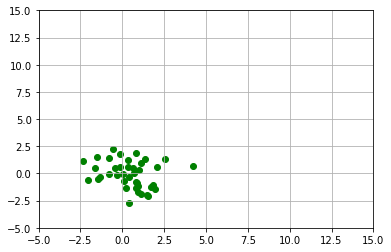

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
MAXN = 40
A=1.25*np.random.randn(MAXN,2)
plt.scatter(A[:,0], A[:,1], color='g')
plt.axis((-5,15,-5,15))
plt.grid()

Creamos otro grupo de puntos aleatorios alrededor del (5, 5) y con factor de escala 1.5

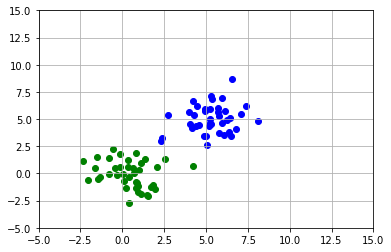

In [2]:
B=5+1.5*np.random.randn(MAXN,2)
plt.scatter(A[:,0], A[:,1], color='g')
plt.scatter(B[:,0], B[:,1], color='b')
plt.axis((-5,15,-5,15))
plt.grid()

Creamos un tercer grupo de puntos aleatorios alrededor del punto (8,3) y con factor de escala 1.0

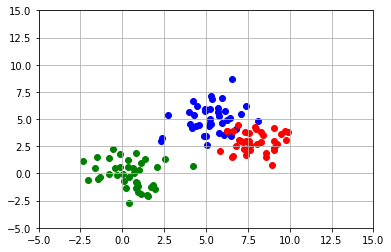

In [3]:
C=[8,3]+1*np.random.randn(MAXN,2)
plt.scatter(A[:,0], A[:,1], color='g')
plt.scatter(B[:,0], B[:,1], color='b')
plt.scatter(C[:,0], C[:,1], color='r')
plt.axis((-5,15,-5,15))
plt.grid()

Creamos una matriz que contenga 3 grupos de puntos aleatorios con distribución normal a los que aplicamos distintos puntos base y escalas

In [4]:
X = np.concatenate([A, B, C])
#X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2), [8,3]+1*np.random.randn(MAXN,2)])

Podemos ver con el color de los puntos a qué clase pertenecen cuando se generan

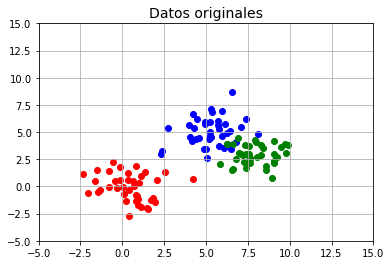

In [5]:
#Para poder visualizarlos con distinto color creamos unas matrices de máscara con números 1, 2 y 3
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1)), 3*np.ones((MAXN,1))])

fig = plt.plot()
plt.scatter(X[(y==1).ravel(),0], X[(y==1).ravel(),1], color='r')
plt.scatter(X[(y==2).ravel(),0], X[(y==2).ravel(),1], color='b')
plt.scatter(X[(y==3).ravel(),0], X[(y==3).ravel(),1], color='g')
plt.title('Datos originales', size=14)
plt.axis((-5,15,-5,15))
plt.grid()

NOTA: np.ravel() crea una matriz 1D a partir de una matriz de varias dimensiones

In [6]:
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [7]:
np.ravel(M)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
M.reshape(-1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Aplicamos un modemo de clasificación no supervisado: K-Means o K-medias.

Entrenamos el modelo con los datos de la matriz X

In [9]:
from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

El modelo asigna una etiqueta o valor de clasificación a cada uno de los puntos de la matriz X

In [10]:
clf.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [11]:
clf.cluster_centers_

array([[ 7.98270691,  2.86513755],
       [ 0.46681027, -0.01214116],
       [ 5.38801662,  5.01878273]])

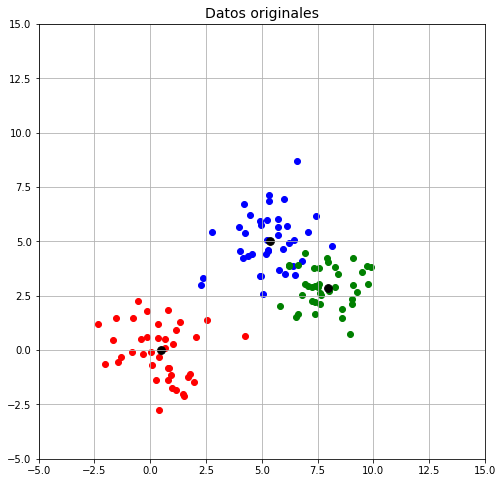

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(X[(y==1).ravel(),0], X[(y==1).ravel(),1], color='r')
plt.scatter(X[(y==2).ravel(),0], X[(y==2).ravel(),1], color='b')
plt.scatter(X[(y==3).ravel(),0], X[(y==3).ravel(),1], color='g')
plt.scatter(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1],color='black', s=60)
plt.title('Datos originales', size=14)
plt.axis((-5,15,-5,15))
plt.grid()

Representamos visualmente la clasificación del espacio bidimensional que realiza nuestro modelo una vez entrenado. 

Para ello creamos una malla de puntos de 200 x 200

In [13]:
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

In [14]:
x

array([-5.        , -4.89949749, -4.79899497, -4.69849246, -4.59798995,
       -4.49748744, -4.39698492, -4.29648241, -4.1959799 , -4.09547739,
       -3.99497487, -3.89447236, -3.79396985, -3.69346734, -3.59296482,
       -3.49246231, -3.3919598 , -3.29145729, -3.19095477, -3.09045226,
       -2.98994975, -2.88944724, -2.78894472, -2.68844221, -2.5879397 ,
       -2.48743719, -2.38693467, -2.28643216, -2.18592965, -2.08542714,
       -1.98492462, -1.88442211, -1.7839196 , -1.68341709, -1.58291457,
       -1.48241206, -1.38190955, -1.28140704, -1.18090452, -1.08040201,
       -0.9798995 , -0.87939698, -0.77889447, -0.67839196, -0.57788945,
       -0.47738693, -0.37688442, -0.27638191, -0.1758794 , -0.07537688,
        0.02512563,  0.12562814,  0.22613065,  0.32663317,  0.42713568,
        0.52763819,  0.6281407 ,  0.72864322,  0.82914573,  0.92964824,
        1.03015075,  1.13065327,  1.23115578,  1.33165829,  1.4321608 ,
        1.53266332,  1.63316583,  1.73366834,  1.83417085,  1.93

In [15]:
x.shape

(200,)

In [16]:
XX

array([[-5.        , -4.89949749, -4.79899497, ..., 14.79899497,
        14.89949749, 15.        ],
       [-5.        , -4.89949749, -4.79899497, ..., 14.79899497,
        14.89949749, 15.        ],
       [-5.        , -4.89949749, -4.79899497, ..., 14.79899497,
        14.89949749, 15.        ],
       ...,
       [-5.        , -4.89949749, -4.79899497, ..., 14.79899497,
        14.89949749, 15.        ],
       [-5.        , -4.89949749, -4.79899497, ..., 14.79899497,
        14.89949749, 15.        ],
       [-5.        , -4.89949749, -4.79899497, ..., 14.79899497,
        14.89949749, 15.        ]])

In [17]:
YY

array([[-5.        , -5.        , -5.        , ..., -5.        ,
        -5.        , -5.        ],
       [-4.89949749, -4.89949749, -4.89949749, ..., -4.89949749,
        -4.89949749, -4.89949749],
       [-4.79899497, -4.79899497, -4.79899497, ..., -4.79899497,
        -4.79899497, -4.79899497],
       ...,
       [14.79899497, 14.79899497, 14.79899497, ..., 14.79899497,
        14.79899497, 14.79899497],
       [14.89949749, 14.89949749, 14.89949749, ..., 14.89949749,
        14.89949749, 14.89949749],
       [15.        , 15.        , 15.        , ..., 15.        ,
        15.        , 15.        ]])

In [18]:
sz

(200, 200)

In [19]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [20]:
data=np.c_[XX.ravel(),YY.ravel()]

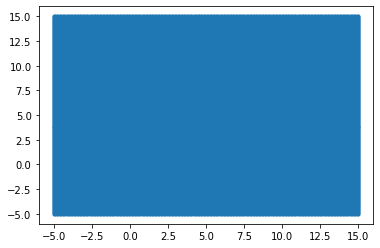

In [21]:
plt.scatter(data[:,0],data[:,1],marker='.')

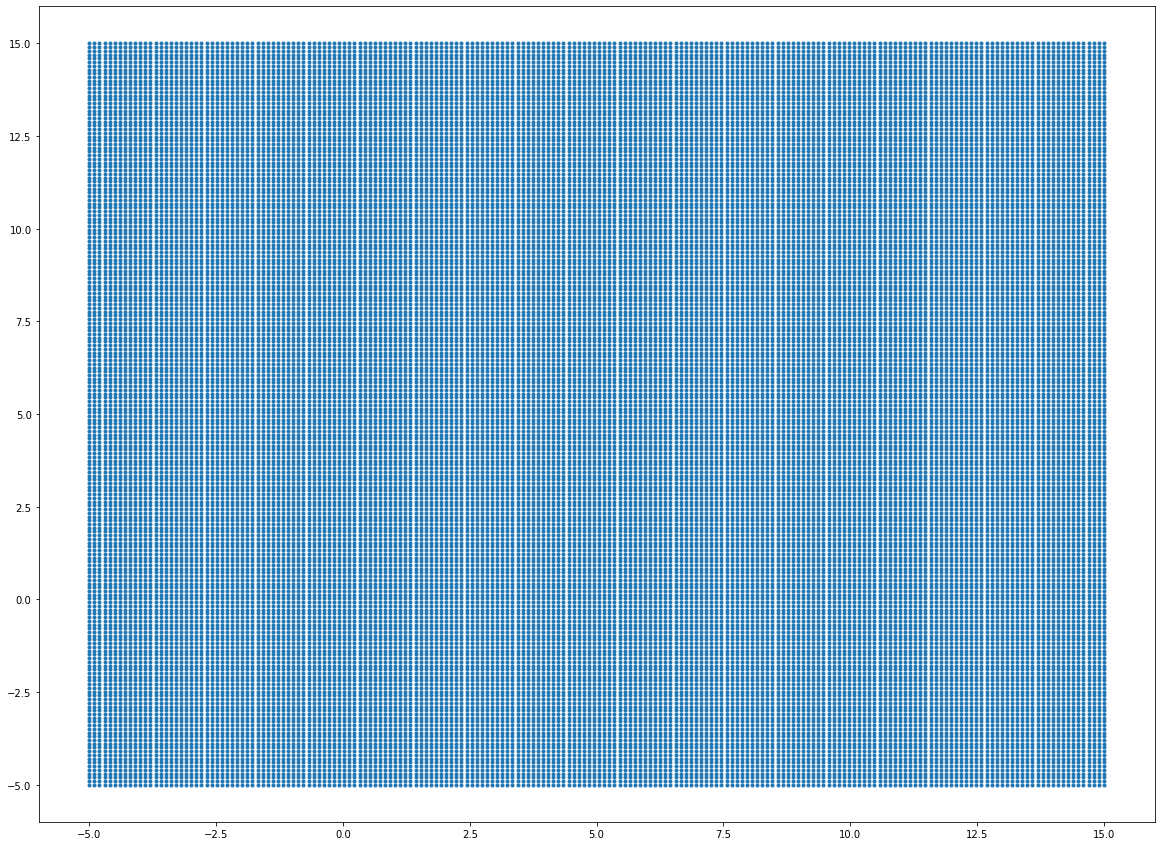

In [22]:
plt.figure(figsize=(20,15))
plt.scatter(data[:,0],data[:,1],marker='.')

Aplicamos el modelo con predict()

In [23]:
Z=clf.predict(data)

Vemos la clasificación que ha realizado de los puntos de la malla

In [24]:
unique_elements, counts_elements = np.unique(Z, return_counts=True)
print(unique_elements,"\n", counts_elements)

[0 1 2] 
 [12657 10729 16614]


Visualizamos la división que realiza del espacio bidimensional y los centroides que ha calculado

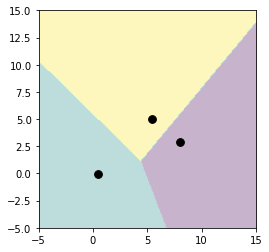

In [25]:
plt.scatter(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1],color='black', s=60)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

Y superponemos los puntos de la matriz X, que son los que queremos clasificar

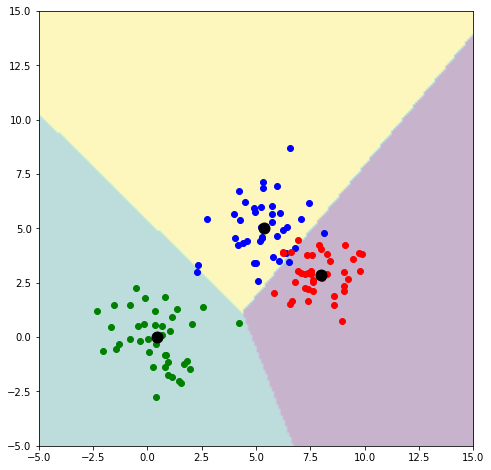

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='g')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r')
plt.scatter(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1],color='black', s=120)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

Podemos ver con el color de los puntos a qué clase pertenecen cuando se generan, y el color de fondo determina cómo particiona K-medias el espacio de asignación. La clasificación que realiza del primer grupo (verde) es buena y la clasificación del segundo y tercer grupo es distinta a la original porque agrupa los puntos por distancia y hay algunos azules que clasificará como rojos y viceversa

A continuación simularemos manualmente el proceso de convergencia de K-medias. Primero elegiríamos unos centros al azar y asociaríamos todos los datos al centro más cercano.

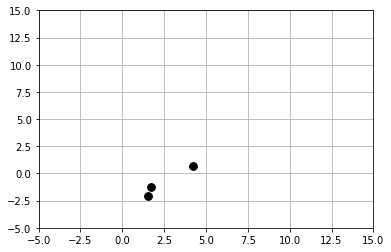

In [27]:
from sklearn import cluster
from scipy.spatial.distance import cdist
K=3

#Select the three centroids: the first three elements of the data
C=X[:3,:]

plt.scatter(C[:,0], C[:,1], color='black', s=60)
plt.axis((-5,15,-5,15))
plt.grid()

Dividimos el espacio en función de la distancia a los 3 centroides que hemos definido inicialmente

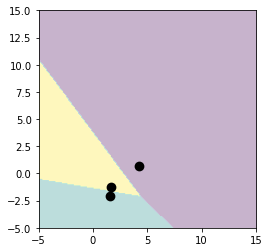

In [28]:
plt.scatter(C[:,0],C[:,1],s=60, 
           color='black', 
           linewidths=2,
           zorder=10)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean')
Z = np.argmin(Y,axis=1)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)


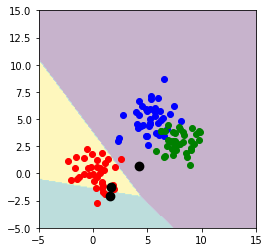

In [29]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=60, 
           color='black', 
           linewidths=2,
           zorder=10)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

Calculamos los nuevos centroides. Para ello, calculamos la distancia de todos los puntos de la matriz X a los centroides iniciales. Vemos a qué zona asigna cada punto de la matriz X. Por último, los nuevos centroides serán los puntos medios para cada grupos que hemos asignado

(-5.0, 15.0, -5.0, 15.0)

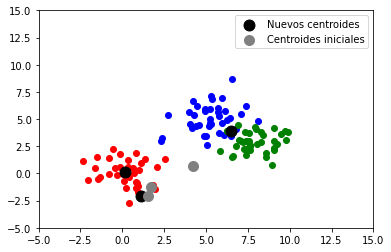

In [30]:
#Compute membership for next iteration
Y = cdist(X, C, 'euclidean')
y_pred = np.argmin(Y,axis=1)
C_0=C.copy()

#Update centroids
for i in range(K):
    C[i,:]=np.mean(X[y_pred==i,:],axis=0)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, color='black',label='Nuevos centroides')
plt.scatter(C_0[:,0],C_0[:,1],s=100, color='grey', label='Centroides iniciales')
plt.legend()
plt.axis((-5,15,-5,15))

Y repetimos la asignación de puntos a los centros más cercanos.


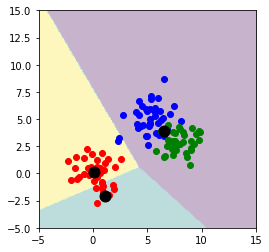

In [31]:
#And the new area of influence
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, color='black')
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean')
Z = np.argmin(Y,axis=1)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)


Repetimos estos dos procesos hasta converger.


##La técnica del codo
Hagamos ese análisis de distancias con el ejemplo anterior, analizando las distancias al incrementar el número de clusters.
El número de clusters óptimo se encuentra en el codo, es decir, cuando la pendiente se reduce notablemente


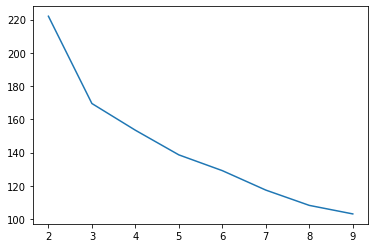

In [32]:
from scipy.spatial import distance
from sklearn import cluster
d=[]
for K in range(2,10):
    clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
    clf.fit(X)
    y_pred = clf.predict(X)
    p=[]
    for i in range(K):
        p.append(np.sum(distance.cdist(X[y_pred==i,:],[clf.cluster_centers_[i]],'euclidean')))
    d.append(np.sum(p))
plt.plot(np.arange(2,10),d)


##Clustering jerárquico


(30, 2)


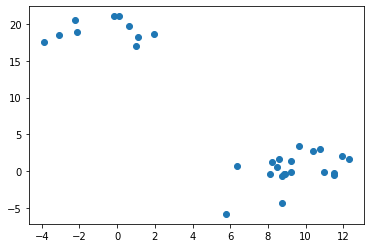

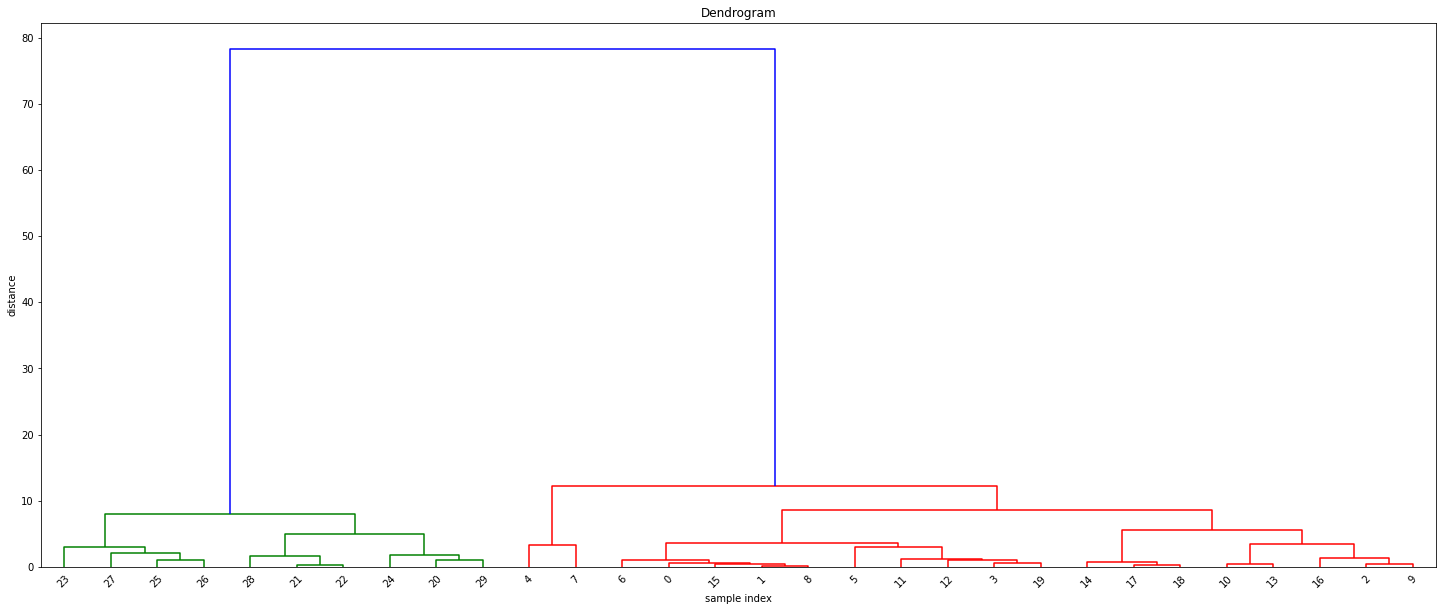

(30, 2)

In [33]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# some setting for this notebook to actually show the graphs inline, you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[20,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[10,])
X = np.concatenate((a, b),)
print (X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

# generate the linkage matrix
Z = linkage(X, 'ward')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)
plt.show()
(30, 2)


##Biclustering
Veamos un ejemplo de biclustering.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.bicluster module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


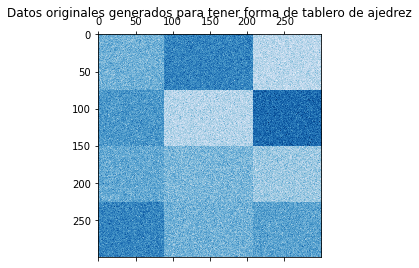

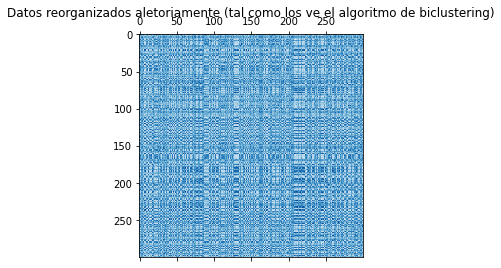

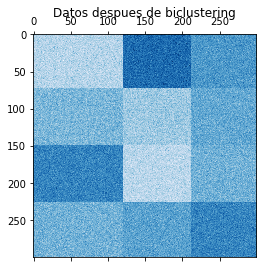

In [34]:
%matplotlib inline
# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.metrics import consensus_score

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Datos originales generados para tener forma de tablero de ajedrez")

data, row_idx, col_idx = sg._shuffle(data, random_state=0)
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Datos reorganizados aletoriamente (tal como los ve el algoritmo de biclustering)")

model = SpectralBiclustering(n_clusters=n_clusters, method='log',
                             random_state=0)
model.fit(data)
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("Datos despues de biclustering")

plt.show()
